<a href="https://colab.research.google.com/github/Edersao/Curso_Data_Scientist/blob/main/DS_C3_SC1_EderSalazar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#para no batallar con .head()
pd.options.display.max_rows = 8
pd.options.display.max_columns = 10


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


El Informe Mundial sobre la Felicidad es una encuesta que clasifica a 156 países por sus niveles de bienestar, tomando en cuenta 6 factores:
1.	Producción económica
2.	Apoyo social
3.	Esperanza de vida
4.	Libertad
5.	Generosidad
6.	Ausencia de corrupción.

El primer informe se publicó en 2012 y continúa ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más indicadores de felicidad para informar sus decisiones de formulación de políticas.

En este sentido, se tomará el estudio del 2019 para explorar los datos por país o región y obtener gráficas relevantes. El archivo incluye el puntaje (score) en una escala donde la mejor vida posible está representada con 10 y la peor con 0. Las siguientes columnas representan la medida en que los seis factores contribuyen a evaluar la felicidad en cada país.

Para lograr lo anterior, descarga el archivo **Happiness_reporte.csv** y el dataframe **Metadata.csv**, y realiza los siguientes pasos:
1.	Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados.

2.	Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.

In [139]:
happiness=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/reto_idnciefelicidad/Happiness_report.csv')
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


3.	A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [140]:
mexico=happiness.loc[happiness['Country or region']== 'Mexico']
mexico.index=mexico['Country or region']
mexico

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,,
Mexico,23,Mexico,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. Ejemplo:

Text(0.5, 1.0, 'Reporte de felicidad mundial')

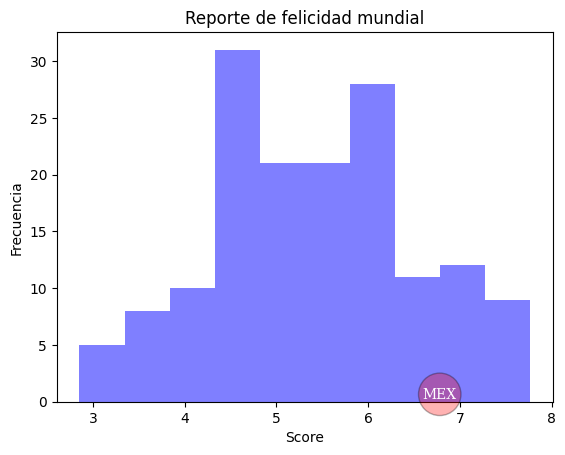

In [141]:
sns.set_palette('Set1')
ax=plt.hist('Score',data=happiness,alpha=0.5,color='blue')
props_bbox = {'boxstyle': 'circle',
              'facecolor': 'red',
              'alpha': 0.3}
props_font = {'family': 'serif','color': 'white'}
plt.text(mexico['Score'][0],0.3,'MEX',bbox=props_bbox,fontdict=props_font)
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.title('Reporte de felicidad mundial')

5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

Text(0.5, 1.0, 'Reporte de felicidad mundia')

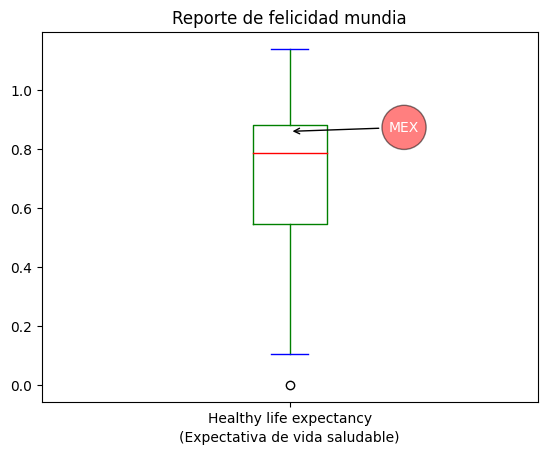

In [142]:
hle=happiness['Healthy life expectancy'].dropna()
valor=mexico['Healthy life expectancy'][0]
hle.plot.box(color=dict(boxes='green', whiskers='green', medians='r', caps='b'))
plt.annotate('MEX',xy=(1,valor),xytext=(1.2,valor),
             arrowprops=dict(arrowstyle='->',color='black'),
             bbox=dict(boxstyle= 'circle',facecolor='red',alpha=0.5,pad=0.5),
             color='white')
plt.xlabel('(Expectativa de vida saludable)')
plt.title('Reporte de felicidad mundia')

6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.

In [143]:
sns.set_palette('husl')
m=mexico.drop(columns=['Country or region','Overall rank','Score'])
piemex=m.T
piemex=pd.DataFrame(data=piemex['Mexico'].values,index=m.columns,columns=['Factores'])
piemex

,Factores
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


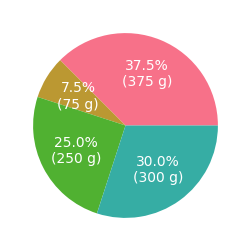

In [144]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} g)"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

Text(0.5, 1.0, 'Contribución en puntaje de felicidad de Mexico')

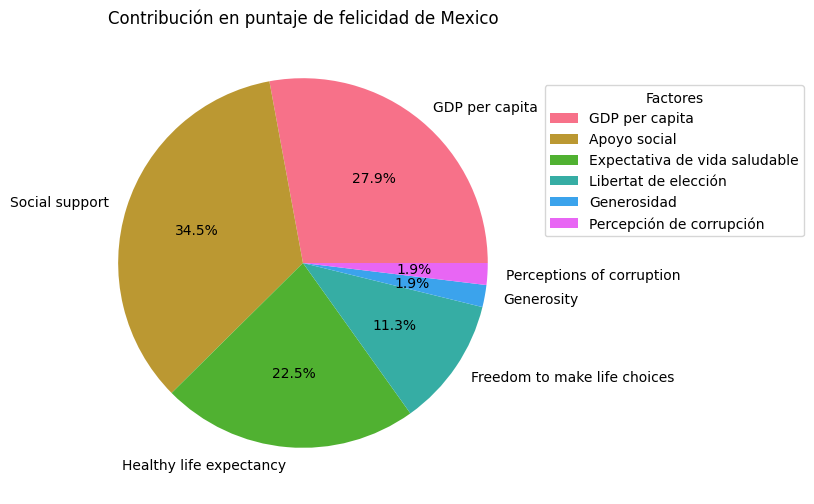

In [145]:
texto=['GDP per capita','Apoyo social','Expectativa de vida saludable',
       'Libertat de elección',
       'Generosidad',
       'Percepción de corrupción']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
w,t,a=ax.pie('Factores',data=piemex,autopct='%1.1f%%',labels=piemex.index)
ax.legend(w, texto,
          title="Factores",
          loc="upper right",
          bbox_to_anchor=(1, 0,0.6, 0.9))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title('Contribución en puntaje de felicidad de Mexico')

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores. Ejemplo:

In [146]:
paises=happiness.loc[(happiness['Country or region']== 'Mexico') | (happiness['Score']== happiness['Score'].max()) |(happiness['Score']== happiness['Score'].min())|
                     (happiness['Country or region']== 'Austria')|(happiness['Country or region']== 'Germany')]
paises.index=paises['Country or region']
paises.drop(columns=['Overall rank','Score','Country or region'],inplace=True)

<ipython-input-146-48012f17ad54>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paises.drop(columns=['Overall rank','Score','Country or region'],inplace=True)


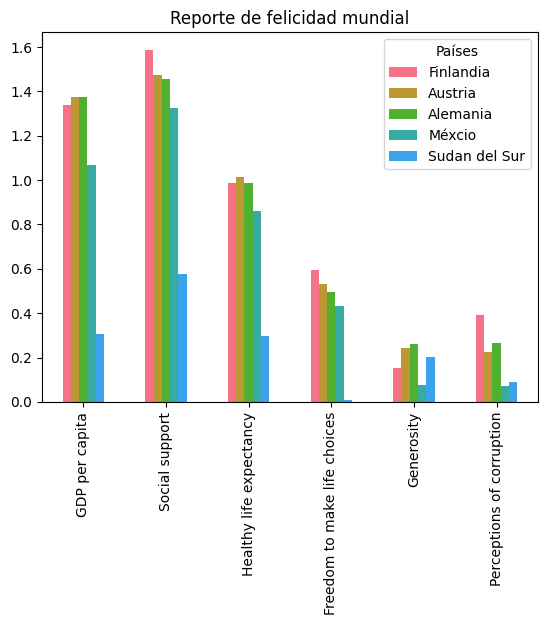

In [147]:
fig, ax = plt.subplots()
paises.T.plot(kind='bar',title='Reporte de felicidad mundial',ax=ax)
ax.legend(["Finlandia", "Austria",'Alemania','Méxcio','Sudan del Sur'],title='Países')

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

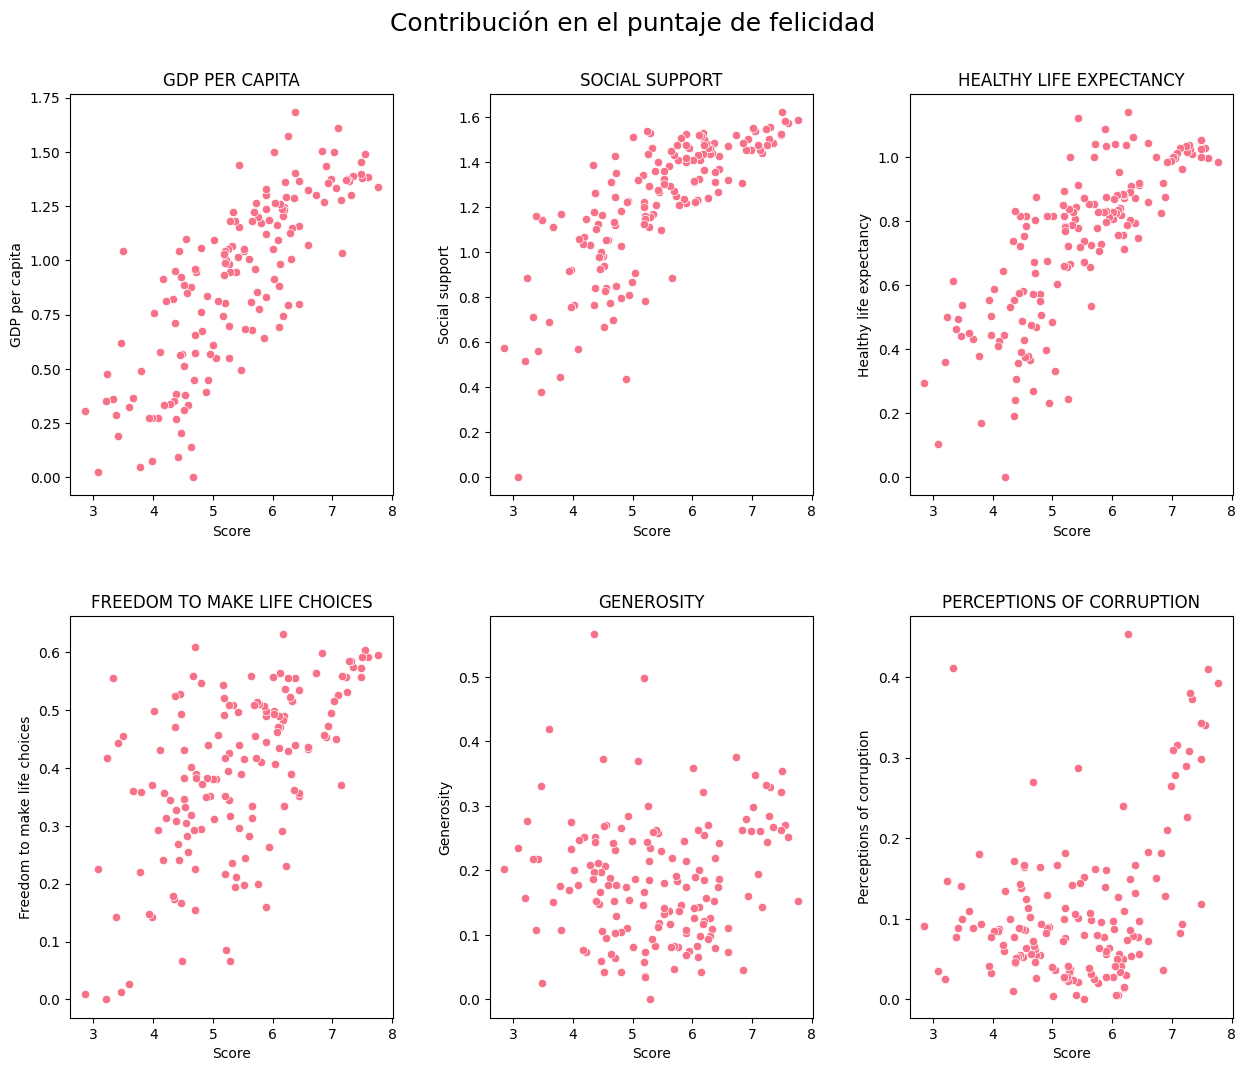

In [148]:
colh=piemex.index
fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(15, 12))
plt.subplots_adjust(hspace=0.3,wspace=0.3)
fig.suptitle("Contribución en el puntaje de felicidad", fontsize=18, y=0.95)

for i, ax in zip(colh,axs.ravel()):
  sns.scatterplot(data=happiness,x='Score',y=i,ax=ax)
  ax.set_title(i.upper())



<Axes: >

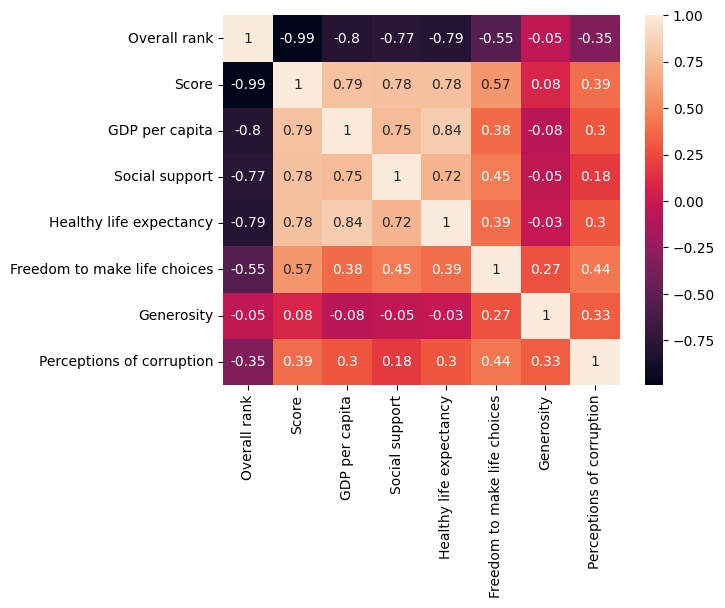

In [149]:
#Comprobando con un heatmap
heath=happiness
heath.index=heath['Country or region']
heath.drop(columns=['Country or region'],inplace=True)
sns.heatmap(round(heath.corr(),2),annot=True)

9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

<ipython-input-150-177171c806ba>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hmm=hm.groupby(['Region']).mean()


Text(0.5, 1.0, 'Reporte de felicidad mundial')

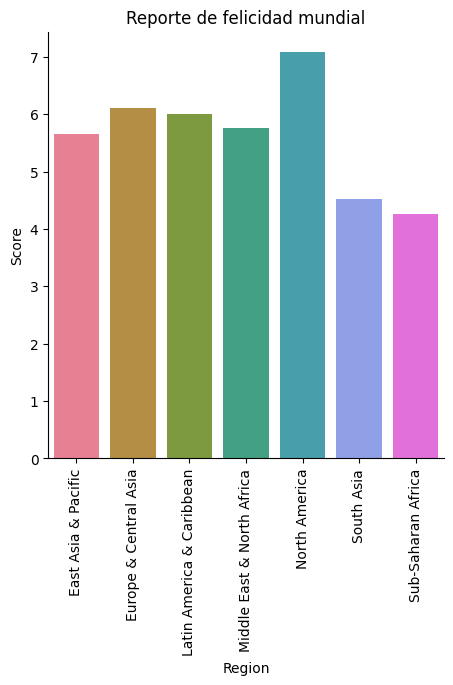

In [150]:
metadata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/reto_idnciefelicidad/Metadata.csv')
hm=happiness.merge(metadata,left_on='Country or region',right_on='TableName')
hmm=hm.groupby(['Region']).mean()
h=sns.catplot(kind='bar',x='Region',y='Score',data=hmm,hue='Region')
h.set_xticklabels(rotation=90)
plt.title('Reporte de felicidad mundial')